In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, lab2rgb, deltaE_cie76
import os
%matplotlib inline
from tqdm import tqdm
import pandas as pd
import webbrowser

In [20]:
class Get_dominant_colors:
    def __init__(self, image_path, size=None):
        '''
        Size should be an Tuple
        '''
        self.image_path = image_path
        self.size = size

    def _get_prepeare_image(self):
        image = cv2.imread(self.image_path)
        self.image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if not self.size is None:
            self.image_RGB = cv2.resize(
                self.image_RGB, self.size, interpolation=cv2.INTER_AREA)
        # Convert to Lab format
        self.image_LAB = self._convert_RGB_LAB()
        # Reshape the image
        self.modified_image = self._reshape_image()

    def _convert_RGB_LAB(self):

        return rgb2lab(np.uint8(np.asarray([self.image_RGB])))

    def _reshape_image(self):

        _shape = self.image_LAB.shape[0] * \
            self.image_LAB.shape[1]*self.image_LAB.shape[2]
        return self.image_LAB.reshape(_shape, 3)

    @staticmethod
    def Lab_2_HEX(color, color_format):
        '''
        This function returns the hex values of the given color.
        The input format should be Lab or RGB
        '''
        assert color_format in [
            'Lab', 'RGB'], 'Color format not in ["Lab", "RGB"]'
        if color_format == 'Lab':
            color = color.reshape(1, 1, 3)
            color = lab2rgb(color)*255
            color = color.reshape(3,)
        return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

    @staticmethod
    def perform_kmeans(X, n_clusters):
        # Instantiate and fit the Kmeans model
        clf = KMeans(n_clusters=n_clusters, random_state=1985).fit(X)
        return clf

    def get_colors(self, number_of_colors, path_to_save=None):
        # Getting the image
        self._get_prepeare_image()

        # perform kmeans
        self.clf = Get_dominant_colors.perform_kmeans(
            self.modified_image, number_of_colors)

        # sort to ensure correct color percentage
        self.counts = dict(sorted(Counter(self.clf.labels_).items(),
                                  key=lambda kv: kv[1], reverse=True))

        # We get ordered colors by iterating through the keys
        self.ordered_colors = list(np.concatenate(
            [self.clf.cluster_centers_[i] for i in self.counts.keys()], axis=0))

        self.hex_colors = [Get_dominant_colors.Lab_2_HEX(self.clf.cluster_centers_[i], 'Lab')
                           for i in self.counts.keys()]

        if not path_to_save is None:
            
            color_comp = open(path_to_save, 'a+')
            
            temp = self.ordered_colors
            temp.extend(list(self.counts.values()))
            color_comp.writelines(["%.6f " % i for i in temp])
            color_comp.writelines("\n")

    def plot_dominant_colors(self, path_to_save = None):
        plt.figure(figsize=(8, 6))
        plt.pie(self.counts.values(), labels=self.hex_colors,
                colors=self.hex_colors)
        if path_to_save != None:
            plt.savefig(path_to_save, dpi = 500, bbox_inches='tight')

    def elbow_plot(self, Num_clusters):
        self._get_prepeare_image()
        Sum_of_squared_distances=[]
        K=range(1, Num_clusters + 1)
        for k in K:
            kmeans_mdl=Get_dominant_colors.perform_kmeans(
                self.modified_image, k)
            Sum_of_squared_distances.append(kmeans_mdl.inertia_)
        plt.plot(K, Sum_of_squared_distances, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Sum_of_squared_distances')
        plt.title('Elbow Method For Optimal k')
        plt.show()

In [26]:
# path = 'data/venus/women/tops/long_sleeve/final_images/Cropped_images/Upper_cloth/zip_up_plaid_top.jpg'

# img_obj = Get_dominant_colors(path)
# img_obj.get_colors(5)
# img_obj.plot_dominant_colors('data/color_comp_upper.jpg')

In [3]:
dir_overal = 'data/venus/women/tops/cold_shoulder/final_images/Cropped_images'
img_dir = os.path.join(dir_overal, 'Face')
color_map_path = dir_overal + '/color_map_Face.txt'
all_images = os.listdir(img_dir)
try:
    all_images.remove('.DS_Store')
except:
    pass
for img in tqdm(all_images):
    image_path = os.path.join(img_dir, img)
    img_obj = Get_dominant_colors(image_path, (600, 400))
    img_obj.get_colors(3, path_to_save = color_map_path)
    
img_file =  dir_overal + '/Face_images.txt'

with open(img_file, 'w') as f:
    for img in all_images:
        f.write('%s\n' % img)
f.close()

100%|██████████| 107/107 [04:02<00:00,  2.23s/it]


In [4]:
img_dir = os.path.join(dir_overal, 'Lower_cloth')
color_map_path = dir_overal + '/color_map_Lower_cloth.txt'
# all_images = os.listdir(img_dir)
# all_images.remove('.DS_Store')
for img in tqdm(all_images):
    image_path = os.path.join(img_dir, img)
    img_obj = Get_dominant_colors(image_path, (600, 400))
    img_obj.get_colors(3, path_to_save = color_map_path)
    
img_file =  dir_overal + '/Lower_cloth_images.txt'

with open(img_file, 'w') as f:
    for img in all_images:
        f.write('%s\n' % img)
f.close()

100%|██████████| 107/107 [02:33<00:00,  1.33s/it]


In [5]:
img_dir = os.path.join(dir_overal, 'Upper_cloth')
color_map_path = dir_overal + '/color_map_Upper_cloth.txt'
# all_images = os.listdir(img_dir)
# all_images.remove('.DS_Store')
for img in tqdm(all_images):
    image_path = os.path.join(img_dir, img)
    img_obj = Get_dominant_colors(image_path, (600, 400))
    img_obj.get_colors(3, path_to_save = color_map_path)
    
img_file =  dir_overal + '/Upper_cloth_images.txt'

with open(img_file, 'w') as f:
    for img in all_images:
        f.write('%s\n' % img)
f.close()

100%|██████████| 107/107 [03:03<00:00,  1.54s/it]


In [46]:
class image_clustering:
    """
    It uses Kmeans clustering to group all
    the images with the same color composition

    Parameters
    ----------
    n_clusters : int, optional, default: 50
        The number of clusters to form as well as the number of
        centroids to generate.
    directory : str
        the direcotory of all files
    product_url_file : str
        The name of csv file including the URL of all images
    n_colors : int
        The number of dominant colors default is 3

    Attributes
    ----------
    cluster_centers_ : array, [n_clusters, n_features]
        Coordinates of cluster centers. If the algorithm stops before fully
        converging (see ``tol`` and ``max_iter``), these will not be
        consistent with ``labels_``.
    labels_ :
        Labels of each point
    inertia_ : float
        Sum of squared distances of samples to their closest cluster center.
    n_iter_ : int
        Number of iterations run.
    """

    def __init__(self, directory, target_color_map, target_color_image, product_url_file,
                 face_file=None, n_clusters=50, weight_face=0, n_colors=3):
        self.n_colors = n_colors
        assert weight_face >= 0 and weight_face <= 1, print(
            'The weight assigned to the face should be between 0 and 1')
        self.weight_face = weight_face
        self.n_clusters = n_clusters
        self.target_path = os.path.join(
            directory, 'final_images/Cropped_images/' + target_color_map)
        
        self.target_image_path = os.path.join(
            directory, 'final_images/Cropped_images/' + target_color_image)
        
        if face_file == None:
            self.face_path = None
        else:
            self.face_path = os.path.join(
                directory, 'final_images/Cropped_images/' + face_file)

        self.csv_path_url = os.path.join(directory, product_url_file)
        
        
        # Read the name of all lower clothes images
        self.df_names = pd.read_csv(self.target_image_path, header=None)

    def fit(self):
        """
        Compute k-means clustering.
        Parameters
        ----------
        X : array-like or sparse matrix, shape=(n_samples, n_features)
            Training instances to cluster. It must be noted that the data
            will be converted to C ordering, which will cause a memory
            copy if the given data is not C-contiguous.
        """
        self.df_target = image_clustering.read_txt_files(
            self.target_path)
        if not self.face_path is None:
            self.df_target = (1-self.weight_face) * self.df_target +\
                self.weight_face * \
                image_clustering.read_txt_files(self.face_path)

        # fit the model
        self.mdl = image_clustering.fit_kmeans(
            self.df_target[list(range(9))], self.n_clusters)

        return self

    @staticmethod
    def read_txt_files(file_path):
        df = pd.read_csv(file_path, sep=" ", header=None)
        freq_cols = [9, 10, 11]
        df[12] = df[freq_cols].sum(axis=1)
        for i in freq_cols:
            df[i] /= df[12]
        color_cols = list(range(0, 9))
        for i in color_cols:
            df[i] *= df[i // 3 + 9]
        try:
            df.drop(columns=[12], axis=1, inplace=True)
        except:
            pass
        return df

    @staticmethod
    def fit_kmeans(X, k):
        mdl = KMeans(n_clusters=k,
                     random_state=1985)
        mdl.fit(X)
        return mdl

    def histohram_plot_cluster(self, path_save_hist=None):
        if not hasattr(img_cluster, 'mdl'):
            raise ValueError('A model should be fitted first!')
        plt.hist(self.mdl.labels_, bins=self.n_clusters)
        plt.title('Histogram of Color Composition')
        plt.xlabel('Cloth group label')
        plt.ylabel('Frequency')
        if not path_save_hist is None:
            plt.savefig(path_save_hist, dpi = 500, bbox_inches='tight')

    def predict(self, image_path_test, face_path_test=None, num_choice=5):
        """
        Predict the closest image to the test image
        Parameters
        ----------
        image_path_test: a path of the test image
        num_choice: the number of desired choices
        Returns
        -------
        labels: array, shape[n_samples, ]
            Index of the cluster each sample belongs to.
        """
        img_colors = image_clustering.normalize_image_colors(image_path_test, self.n_colors)
        if not self.face_path is None:
            temp_face = image_clustering.normalize_image_colors(
                face_path_test, self.n_colors)
            img_colors = temp_face * self.weight_face + \
                (1 - self.weight_face) * img_colors

        # Predict cluster number for the test image
        test_label = self.mdl.predict(img_colors)

        # Finding the index of neighbors in the same cluster
        neighbor_images_idx = np.where(
            img_cluster.mdl.labels_ == test_label[0])

        # Find the closest images to the target image
        ranked_neighbors_diff = image_clustering.Lab_color(
            img_colors, neighbor_images_idx, self.df_target, self.n_colors)
        closest_neighbors = self.df_names.iloc[list(
            ranked_neighbors_diff.keys())[0:num_choice]][0]

        # find the url of the closest images
        image_clustering.open_urls(closest_neighbors, self.csv_path_url)
        print(closest_neighbors)

    @staticmethod
    def normalize_image_colors(img_path, n_colors):
        img = Get_dominant_colors(img_path, (600, 400))
        img.get_colors(n_colors)
        img_colors = img.ordered_colors
        img_colors.extend(list(img.counts.values()))
        img_colors = np.array(img_colors).reshape(1, -1)
        # Normalize the color map based on their contributions
        for i in range(n_colors):
            img_colors[0][i*3:(i+1)*3] = img_colors[0][i*3:(i+1)*3] * \
                img_colors[0][n_colors*3+i]/sum(img_colors[0][n_colors*3:])
        return img_colors[0][:-n_colors].reshape(1, -1)

    @staticmethod
    def open_urls(image_names, csv_path_url):
        df_url = pd.read_csv(csv_path_url)
        for image in image_names:
            url = list(df_url.loc[df_url['image_name'] ==
                              image[:-4], 'product_url'])[0]
            webbrowser.open(url)

    @staticmethod
    def Lab_color(target_image, neighbor_images, df_images, n_colors):
        total_diff = {}
        for idx in neighbor_images[0]:
            diff = 0
            for i in range(n_colors):
                target_color = target_image[0][i*3:(i+1)*3]
                cur_color = np.array(df_images.iloc[idx, i*3:(i+1)*3])
                diff += deltaE_cie76(target_color, cur_color)
            total_diff[idx] = diff
        total_diff = dict(sorted(total_diff.items(), key=lambda kv: kv[1]))
        return total_diff

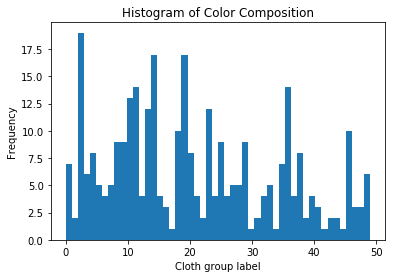

In [47]:
directory = 'data/venus/women/tops/long_sleeve'
img_cluster = image_clustering(directory,
                               target_color_map = 'color_map_Lower_cloth.txt',
                               target_color_image = 'Lower_cloth_images.txt',
                               product_url_file = 'long_sleeve.csv',
                               face_file = 'color_map_Face.txt',
                               n_clusters = 50,
                               weight_face = 0.4,
                               n_colors = 3).fit()


img_cluster.histohram_plot_cluster(path_save_hist='data/hist_color.jpg')
# target_img_path = directory + '/final_images/Cropped_images/Lower_cloth/crushed_velvet_lace_top.jpg'
# face_img_path = directory + '/final_images/Cropped_images/Face/crushed_velvet_lace_top.jpg'
# img_cluster.predict(target_img_path, face_img_path, num_choice = 3)

In [90]:
directory = 'data/venus/women/tops/long_sleeve'
img_cluster = image_clustering(directory,
                               target_color_map = 'color_map_Lower_cloth.txt',
                               target_color_image = 'Lower_cloth_images.txt',
                               product_url_file = 'long_sleeve.csv',
                               face_file = 'color_map_Face.txt',
                               n_clusters = 50,
                               weight_face = 0,
                               n_colors = 3).fit()


#img_cluster.histohram_plot_cluster(path_save_hist='data/hist_color_Upper.jpg')
img_name = 'floral_off_the_shoulder_top.jpg'
target_img_path = directory + '/final_images/Cropped_images/Lower_cloth/' +  img_name
face_img_path = directory + '/final_images/Cropped_images/Face/' + img_name
img_cluster.predict(target_img_path, face_img_path, num_choice = 5)

3      floral_off_the_shoulder_top.jpg
63              lace_mock_neck_top.jpg
160    ruffle_sleeve_tie_front_top.jpg
262      crochet_detail_ribbed_top.jpg
23               paisley_print_top.jpg
Name: 0, dtype: object


In [137]:
directory = 'data/venus/women/tops/long_sleeve'
img_cluster = image_clustering(directory,
                               target_color_map = 'color_map_Upper_cloth.txt',
                               target_color_image = 'Upper_cloth_images.txt',
                               product_url_file = 'long_sleeve.csv',
                               face_file = 'color_map_Face.txt',
                               n_clusters = 50,
                               weight_face = 0,
                               n_colors = 3).fit()


#img_cluster.histohram_plot_cluster(path_save_hist='data/hist_color_Upper.jpg')
img_name = 'embroidered_bell_sleeve_top.jpg'
target_img_path = directory + '/final_images/Cropped_images/Upper_cloth/' +  img_name
face_img_path = directory + '/final_images/Cropped_images/Face/' + img_name
img_cluster.predict(target_img_path, face_img_path, num_choice = 10)

36     embroidered_bell_sleeve_top.jpg
122      tie_front_ring_detail_top.jpg
87            seamless_cut_out_top.jpg
248        fringe_detail_tunic_top.jpg
174            sleeve_detailed_top.jpg
56       lace_up_cold_shoulder_top.jpg
134      embellished_lace_cardigan.jpg
113        lace_detail_lace_up_top.jpg
89       long_sleeve_wrap_crop_top.jpg
39               draped_sleeve_top.jpg
Name: 0, dtype: object


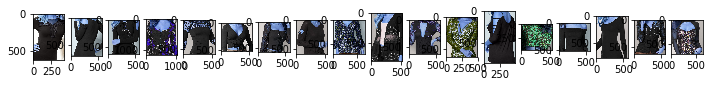

In [133]:
directory = 'data/venus/women/tops/long_sleeve/final_images/Cropped_images/Upper_cloth/'
plt.figure(figsize = (12, 8))
my_list = img_cluster.df_names.loc[np.where(img_cluster.mdl.labels_ == 8)][0]
for idx, img in enumerate(my_list):
    path = directory + img
    img = cv2.imread(path)
    plt.subplot(1,len(my_list), idx+1)
    plt.imshow(img)

In [134]:
my_list

36     embroidered_bell_sleeve_top.jpg
39               draped_sleeve_top.jpg
56       lace_up_cold_shoulder_top.jpg
78      floral_printed_button_down.jpg
87            seamless_cut_out_top.jpg
89       long_sleeve_wrap_crop_top.jpg
113        lace_detail_lace_up_top.jpg
122      tie_front_ring_detail_top.jpg
131      printed_velvet_v-neck_top.jpg
134      embellished_lace_cardigan.jpg
150         embroidered_choker_top.jpg
159        strappy_detail_lace_top.jpg
174            sleeve_detailed_top.jpg
204      python_printed_sweatshirt.jpg
243         off_the_shoulder_top_7.jpg
248        fringe_detail_tunic_top.jpg
253          tweed_detail_lace_top.jpg
272       metallic_snake_print_top.jpg
Name: 0, dtype: object